In [1]:
import pandas as pd

data = {
    "email": [
        "Win money now",
        "Limited offer click now",
        "Meeting scheduled tomorrow",
        "Project deadline discussion",
        "Earn cash fast",
        "Important update from bank",
        "Free prize win today",
        "Let's have lunch tomorrow"
    ],
    "label": [1,1,0,0,1,0,1,0]  # 1 = Spam, 0 = Ham
}

df = pd.DataFrame(data)
df


,email,label
0,Win money now,1
1,Limited offer click now,1
2,Meeting scheduled tomorrow,0
3,Project deadline discussion,0
4,Earn cash fast,1
5,Important update from bank,0
6,Free prize win today,1
7,Let's have lunch tomorrow,0


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])
y = df["label"]

print(vectorizer.get_feature_names_out())


['bank' 'cash' 'click' 'deadline' 'discussion' 'earn' 'fast' 'free' 'from'
 'have' 'important' 'let' 'limited' 'lunch' 'meeting' 'money' 'now'
 'offer' 'prize' 'project' 'scheduled' 'today' 'tomorrow' 'update' 'win']


In [3]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
# Model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [5]:
# Prediction
y_pred = model.predict(X_test)

In [8]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report


print("Accuracy:",accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



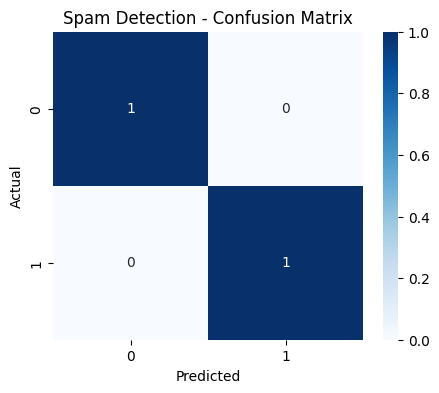

In [9]:
# Visualization – Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Spam Detection - Confusion Matrix")
plt.show()
